# Data Engineering

In [216]:
import missingno as msno
import pandas as pd
from numpy import nan

%matplotlib inline

In [217]:
data = pd.read_csv("../docs/dataset_DT.csv")
data.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day          float64
month         object
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome      object
y             object
dtype: object

In [218]:
data["pdays"].unique()

array([ -1., 132., 261., 307., 131., 135., 329., 133., 225., 303., 115.,
       350., 184.,  94., 370., 217., 308., 287., 134., 258., 267., 136.,
       314., 240., 262., 249., 323.,  31., 302., 270., 430., 108., 186.,
       241., 180., 374., 626., 185., 426., 139., 325., 257., 312., 118.,
       138., 313., 327., 305., 335., 319., 265., 255., 222., 363.,  98.,
       210., 236., 266., 137., 253., 330., 140., 243.,  39., 230., 292.,
       295., 141., 331., 310.,  57., 320., 264., 160., 321., 315., 336.,
       163., 316., 142., 182., 181., 187., 199., 206., 334., 144., 300.,
       340., 393., 143., 228.,  17., 256., 146., 348., 595., 242., 179.,
       145., 147., 263., 328.,  74., 148., 183., 271., 381., 272., 299.,
       344., 178., 337., 341., 378., 311., 246., 317., 231., 269., 150.,
       342., 248., 339., 149., 322., 268., 281., 324., 345., 234., 318.,
       343., 254., 346., 326., 332.,  73., 274., 260., 304., 333., 275.,
       238.,  14., 367., 364., 154., 376., 245., 15

In [219]:
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = data[col].replace([nan, "", " ", "unknown"], pd.NA)

data["pdays"] = data["pdays"].replace([-1], [float(nan)])


<Axes: >

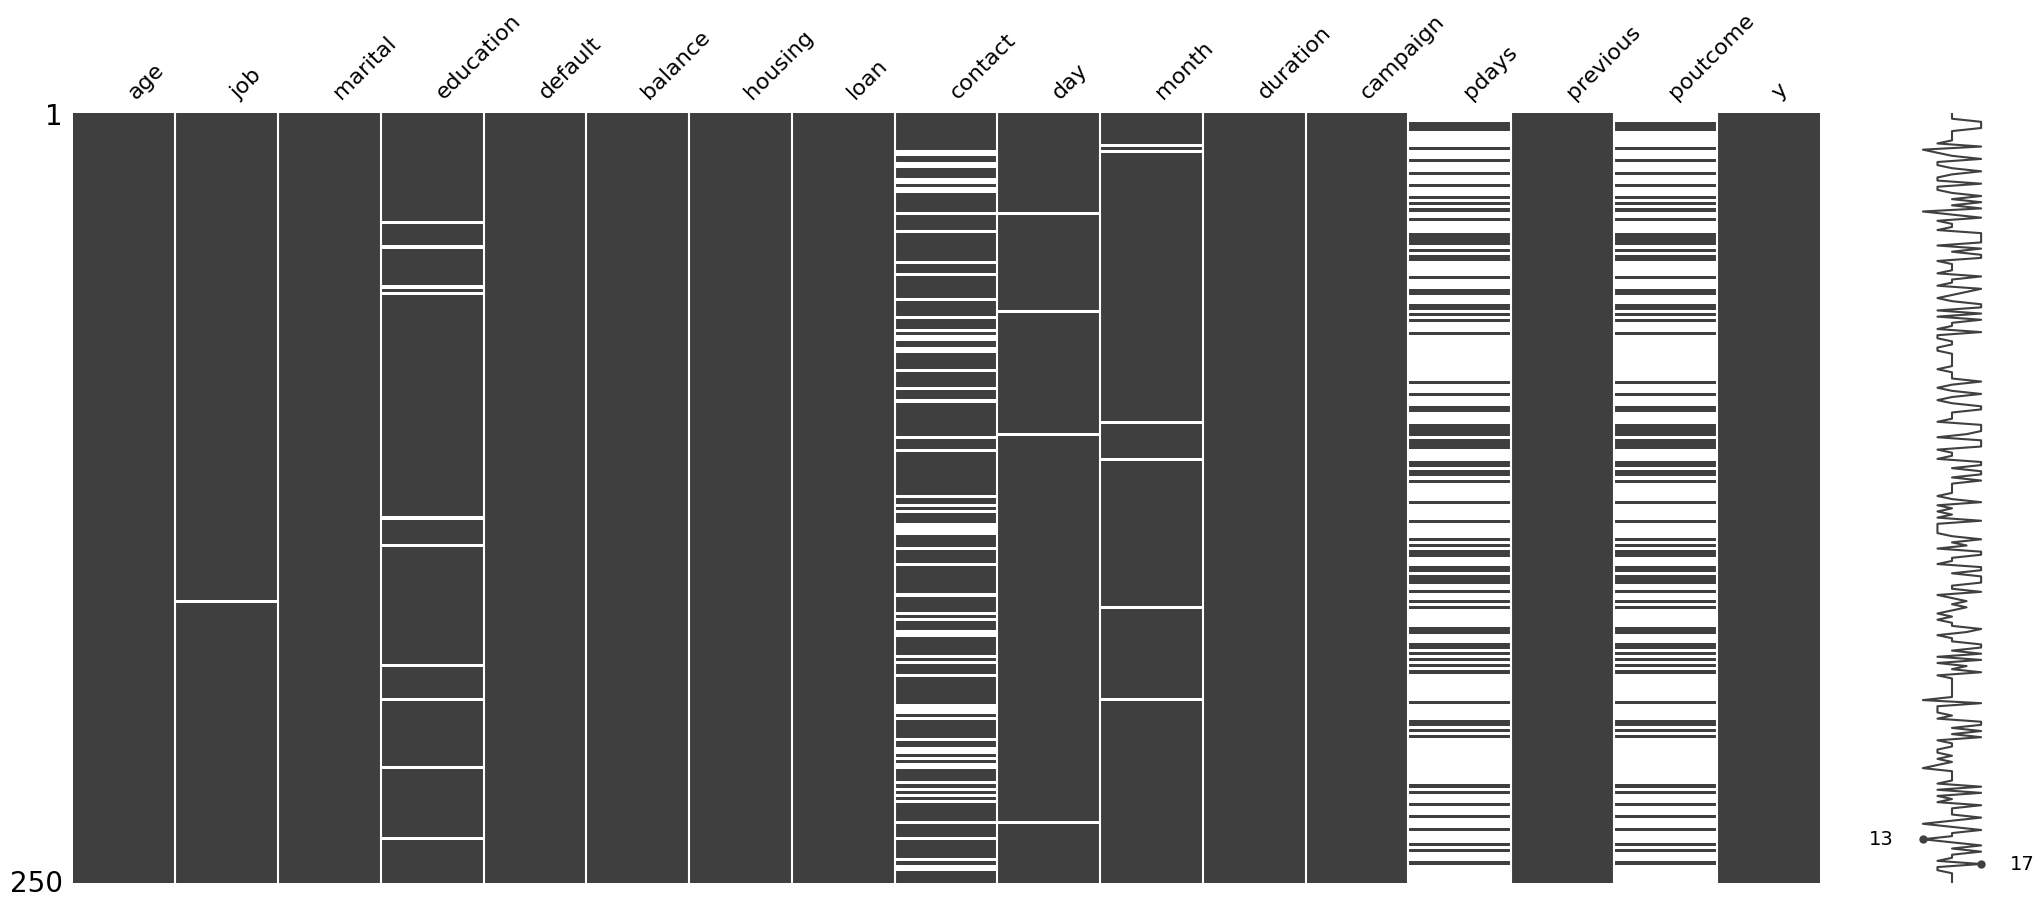

In [220]:
msno.matrix(data.sample(250))

<Axes: >

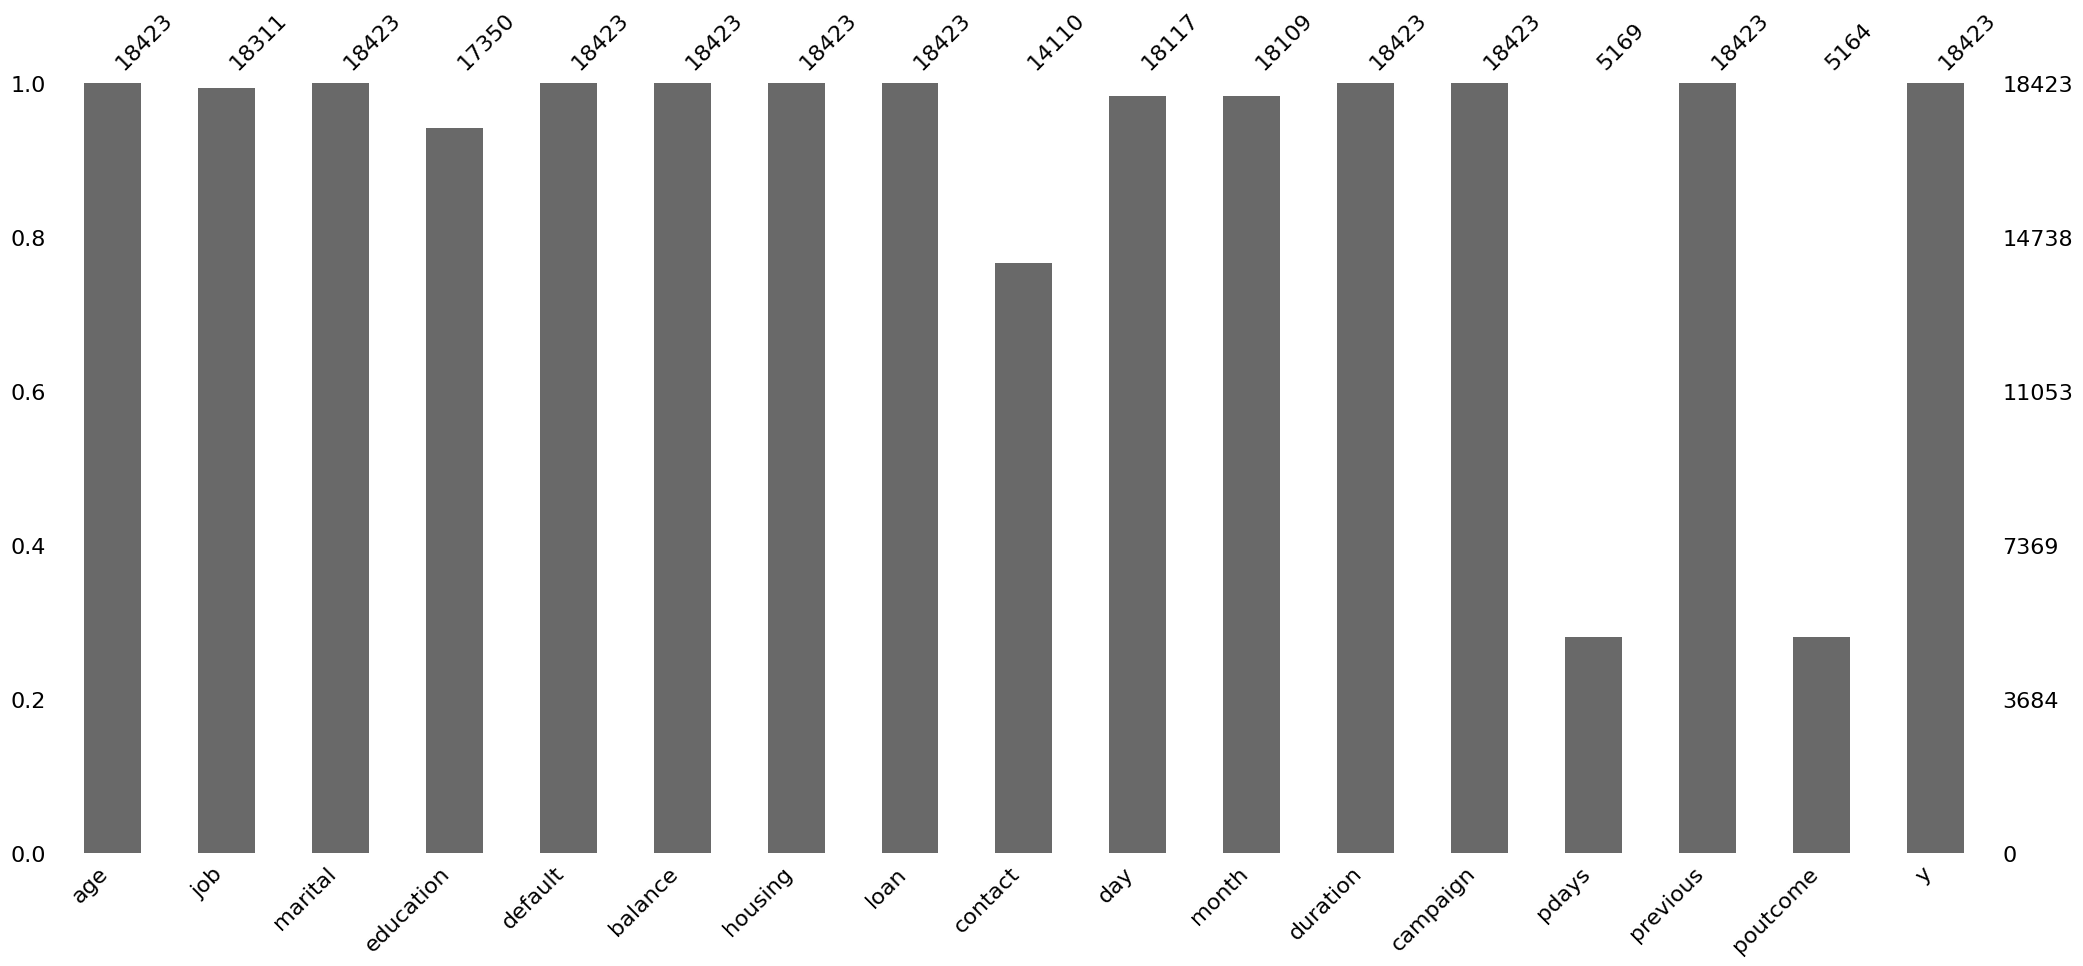

In [221]:
msno.bar(data)

<Axes: >

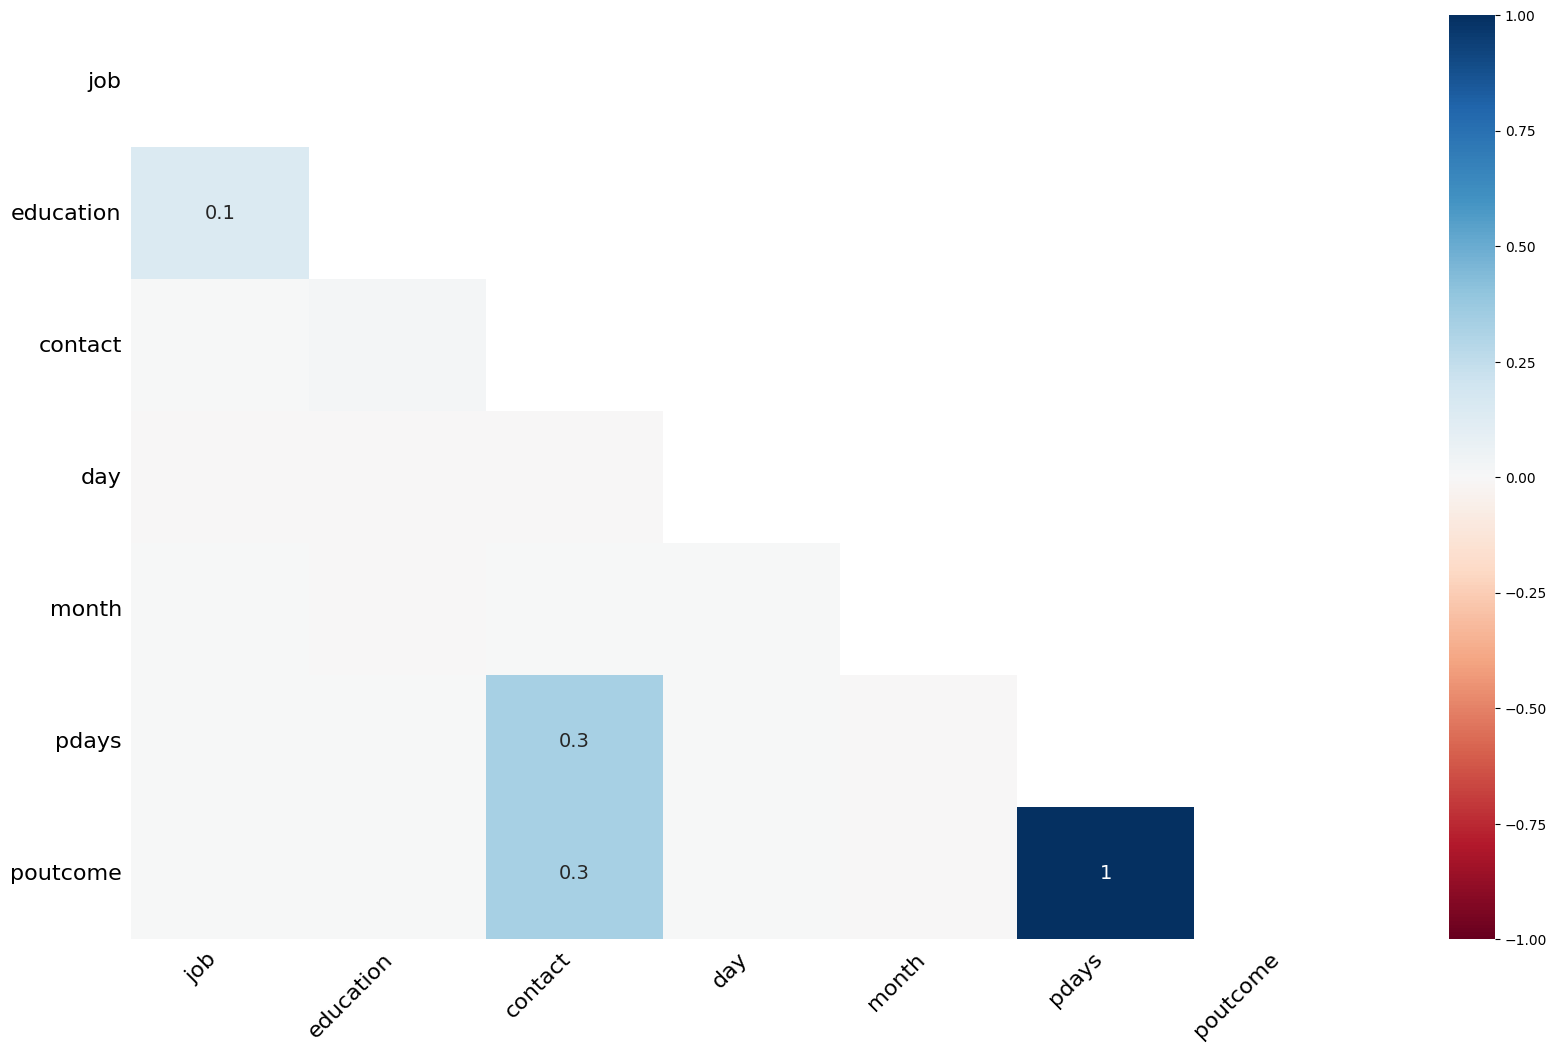

In [222]:
msno.heatmap(data)

<Axes: >

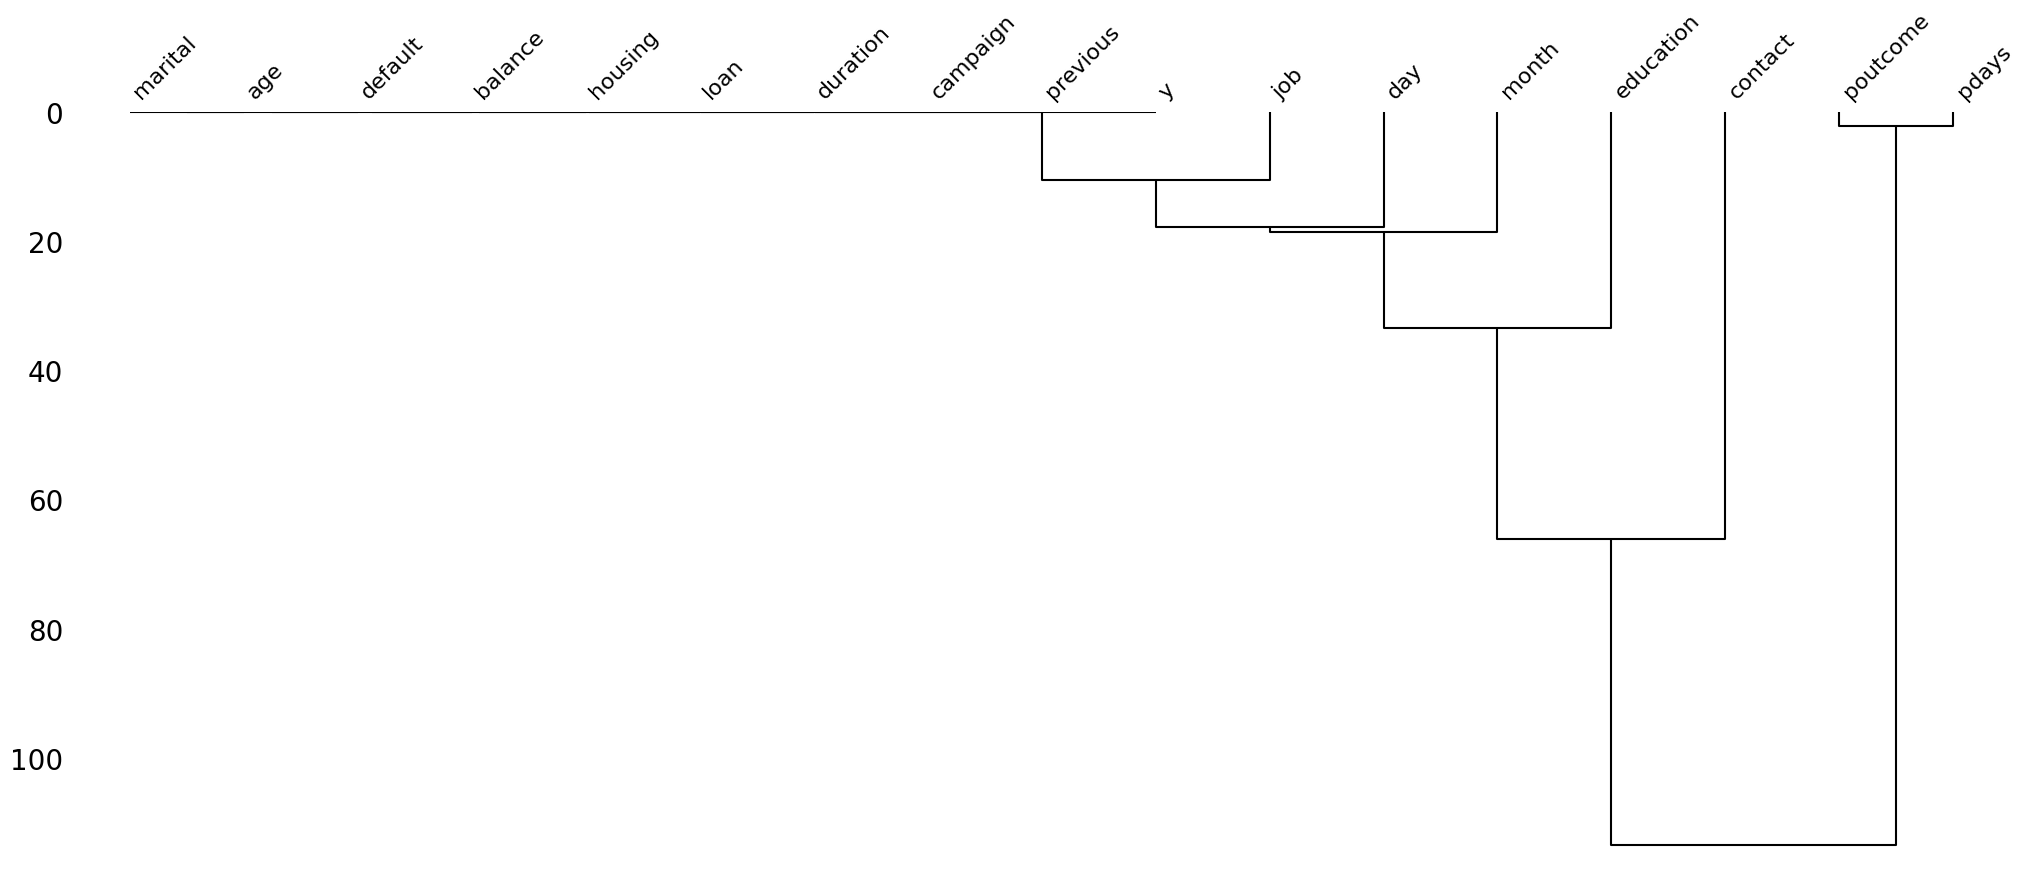

In [223]:
msno.dendrogram(data)

In [224]:
percent_missing = data.isnull().sum() * 100 / len(data)

print(percent_missing)

age           0.000000
job           0.607936
marital       0.000000
education     5.824241
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      23.410954
day           1.660967
month         1.704391
duration      0.000000
campaign      0.000000
pdays        71.942680
previous      0.000000
poutcome     71.969820
y             0.000000
dtype: float64


In [225]:
data.dropna(subset=["job"], inplace=True)

In [226]:
# Drop records where poutcome is null and pdays is not. This is likely a sampling error.
data = data[~((data["poutcome"].isnull()) & (data["pdays"].notnull()))]

In [227]:
# Creating day to int from float
data["day"] = pd.to_numeric(data["day"], errors="coerce").fillna(0).astype(int)
data["day"]

0         1
1         1
2         1
3         1
4         1
         ..
18418    30
18419    30
18420    30
18421    30
18422    30
Name: day, Length: 18306, dtype: int64

In [228]:
# Define a function to handle day and month data, and add the year 2024
def create_date(row):
    """Creates a date from the 'day' and 'month' columns in a DataFrame row, assuming the year is 2024.

    The function handles potential errors in day and month values and returns NaT (Not a Time)
    if a valid date cannot be created.

    Args:
        row (pandas.Series): A row from a Pandas DataFrame containing 'day' and 'month' columns.

    Returns:
        pandas.Timestamp or pandas.NaT:
            - A pandas Timestamp representing the created date if successful.
            - NaT (Not a Time) if either 'day' or 'month' is missing or if there's an error
              converting the values to a date.
    """
    # Only create date if both day and month are available
    if pd.notna(row["day"]) and pd.notna(row["month"]):
        try:
            # Ensure that day is integer if possible
            day = int(row["day"])
            # Use the month from the row and assume 2024 as the year
            return pd.to_datetime(f'2024-{row["month"]}-{day}', format="%Y-%b-%d", errors="coerce")
        except Exception:
            return pd.NaT  # Return a NaT (Not a Time) if any error occurs
    else:
        return pd.NaT  # Return NaT if either day or month is missing


# Apply the function to each row
data["date"] = data.apply(create_date, axis=1)

# Fill forward the missing dates by propagating the previous non-null date
data["date"] = data["date"].ffill()

In [229]:
data = data.drop(["day", "month"], axis=1)
data["day"] = data["date"].dt.day
data["mont"] = data["date"].dt.month
data.drop("date", axis=1)

KeyError: "['date'] not found in axis"